In [1]:
import  numpy as np
# import  scipy # from    scipy.optimize import curve_fit # from    scipy.stats import ks_2samp

In [2]:
def landau(x, *par):
    w = x - par[0]
    return par[1]*np.exp(-(w+np.exp(-par[4]*w))/par[2])+par[3]

In [6]:
import  numpy as np
from numpy import loadtxt
map = loadtxt('map.csv', delimiter=',',dtype="i8")

In [2]:
def find_index(n):
    for i in range(0,8):
        for j in range(0,8):
            if map[i][j]==n:
                return (i,j)
    return (None, None)

In [3]:
infile = 'test.npy'
with open(infile, 'rb') as f: X = np.load(f)
print(f'''Read an array: {X.shape}''')

Read an array: (14029, 64, 32)


In [4]:
import ipywidgets as widgets
from IPython.display import display
w = widgets.IntSlider(min=0, max=63, description='Channel')
display(w)


IntSlider(value=0, description='Channel', max=63)

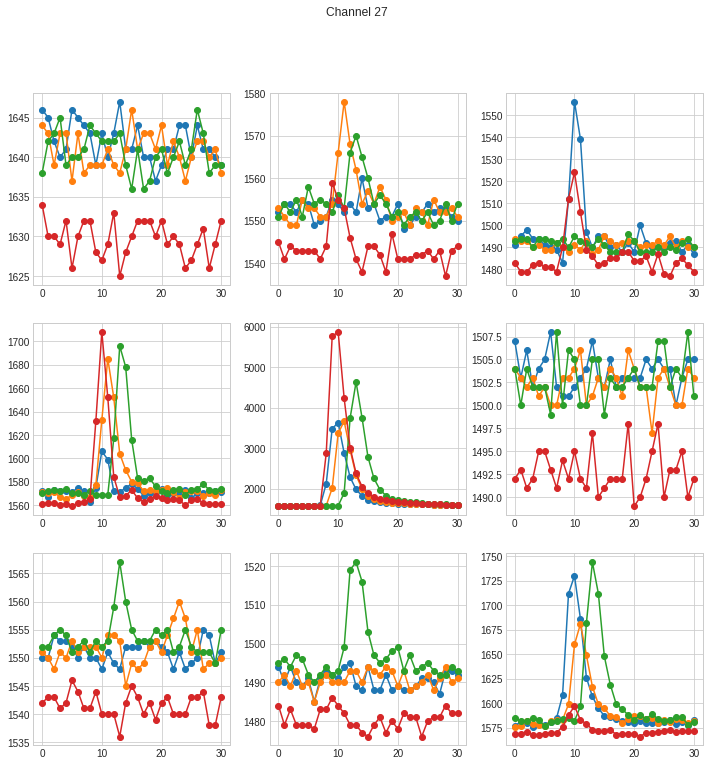

In [7]:
import  numpy as np
import  matplotlib.pyplot as plt

channel = w.value
x = np.linspace(0, 31, 31, endpoint=False)
# print('Linspace:', x)
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,10)

x1 = np.linspace(0, 30, 300, endpoint=False)

first   = True
cnt     = 0

(fig, panels) = plt.subplots(3,3)

fig.set_size_inches(12.0, 12.0)
fig.suptitle(f'''Channel {channel}''')

for i in range(0,1000):
    wave        =   X[i][channel][:31]
    pedestal    =   np.average(wave[0:5]) # print(wave) print(pedestal)
    std         =   np.std(wave[0:5])

    if(pedestal>1700 or std>7): continue
    maxindex    =   np.argmax(wave[2:20])
    maxval      =   wave[maxindex]

    if maxval > 1700:
        panels[1][1].plot(x, wave, 'o', linestyle='solid')
        cnt+=1

        coord = find_index(channel)

        if coord[0]>0:
            channel_n = map[coord[0]-1][coord[1]]
            # print(channel_n)
            wave_n = X[i][channel_n][:31]
            panels[0][1].plot(x, wave_n, 'o', linestyle='solid')

            if coord[1]>0:
                channel_nw = map[coord[0]-1][coord[1]-1]
                wave_nw = X[i][channel_nw][:31]
                panels[0][0].plot(x, wave_nw, 'o', linestyle='solid')

            if coord[1]<7:
                channel_ne = map[coord[0]-1][coord[1]+1]
                wave_ne = X[i][channel_ne][:31]
                panels[0][2].plot(x, wave_ne, 'o', linestyle='solid')

        if coord[1]>0:
            channel_w = map[coord[0]][coord[1]-1]
            wave_w = X[i][channel_w][:31]
            panels[1][0].plot(x, wave_w, 'o', linestyle='solid')

        if coord[1]<7:
            channel_e = map[coord[0]][coord[1]+1]
            wave_e = X[i][channel_e][:31]
            panels[1][2].plot(x, wave_e, 'o', linestyle='solid')


        if coord[0]<7:
            channel_s = map[coord[0]+1][coord[1]]
            #print(channel_s)
            wave_s = X[i][channel_s][:31]
            panels[2][1].plot(x, wave_s, 'o', linestyle='solid')

            if coord[1]>0:
                channel_sw = map[coord[0]+1][coord[1]-1]
                wave_sw = X[i][channel_sw][:31]
                panels[2][0].plot(x, wave_sw, 'o', linestyle='solid')

            if coord[1]<7:
                channel_se = map[coord[0]+1][coord[1]+1]
                wave_se = X[i][channel_se][:31]
                panels[2][2].plot(x, wave_se, 'o', linestyle='solid')

        if cnt>3: break



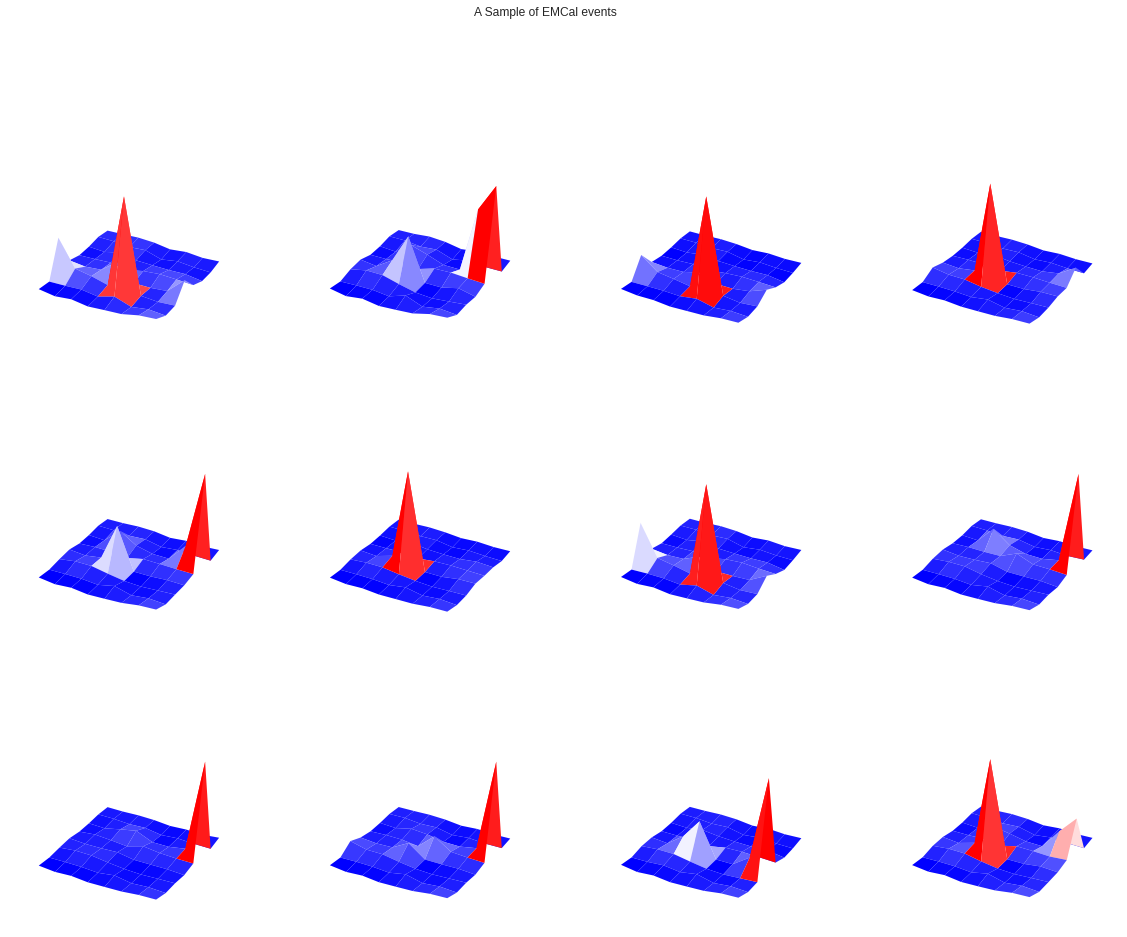

In [8]:
from matplotlib import cm
channel = w.value
(fig, panels) = plt.subplots(3,4, subplot_kw={'projection': '3d'})

fig.set_size_inches(20.0, 15.0)
fig.suptitle(f'''A Sample of EMCal events''')

x_ = np.arange(0,8)
y_ = np.arange(0,8)
x_, y_ = np.meshgrid(x_, y_)

face = np.zeros(shape=(8,8), dtype=np.int32)
cnt=0
ip = 0
jp = 0
for n in range(0,5000):
    for i in range(0,8):
        for j in range(0,8):
            channel = map[i][j]
            wave = X[n][channel][:31]
            peak = np.amax(wave)
            face[i][j] = peak
    
    maxface = np.amax(face)
    if maxface<1700: continue
    cnt+=1
    if cnt<37: continue
    #panels[ip][jp].imshow(face, cmap="viridis")

    panels[ip][jp].plot_surface(x_, y_, face, cmap=cm.bwr)
    panels[ip][jp].axis('off')
    jp+=1
    if jp==4:
        jp=0
        ip+=1

    if ip==3: break

[[1510 1458 1518 1476 1507 1551 1642 1684]
 [1474 1502 1561 1484 1613 1484 1619 1546]
 [1537 1627 1672 1627 1487 1471 1534 1678]
 [1576 1539 1732 1572 1500 1513 1669 1503]
 [1493 1508 1543 1487 1573 1625 1619 1611]
 [1515 1488 1588 1518 1517 1523 1565 1463]
 [1554 1566 1527 1567 1456 1528 1499 1494]
 [1519 1527 1566 1561 1501 1551 1528 1554]]


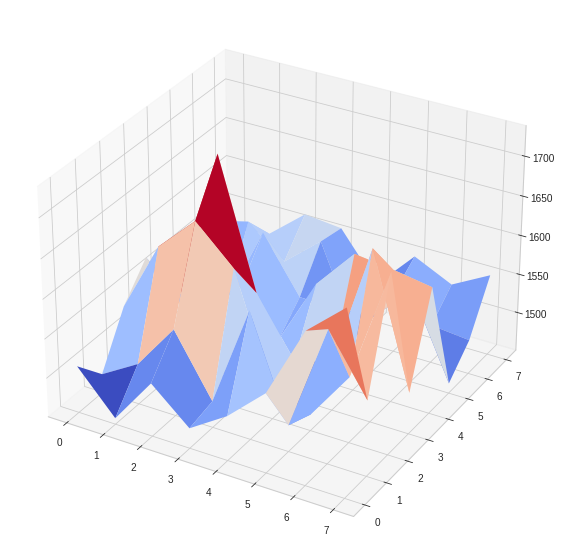

In [16]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(face)

# Make data.
X_ = np.arange(0,8)
Y_ = np.arange(0,8)
X_, Y_ = np.meshgrid(X_, Y_)
#R = np.sqrt(X**2 + Y**2)
Z = face
surf = ax.plot_surface(X_, Y_, Z, cmap=cm.coolwarm)
#dx = dy = np.ones_like(Z)
#dz = Z.ravel()
#surf = ax.bar3d(X, Y, Z, dx, dy, dz)

In [19]:
# Find and rank maxima
import  numpy as np
print(X.size)
for n in range(0,5):
    for nch in range(0,31):
        wave = X[n][nch][:31]
        peak = np.amax(wave)
        print(nch, peak)

215132160
0 1642
1 1682
2 1563
3 1547
4 1506
5 1547
6 1610
7 1482
8 1516
9 1474
10 1513
11 1485
12 1510
13 1460
14 1473
15 1498
16 1517
17 1637
18 1537
19 1499
20 1482
21 1473
22 1498
23 1510
24 1636
25 1587
26 1563
27 1571
28 1534
29 1628
30 1580
0 1646
1 1686
2 1567
3 1549
4 1507
5 1553
6 1616
7 1484
8 1518
9 1482
10 1522
11 1487
12 1512
13 1462
14 1475
15 1500
16 1519
17 1560
18 1542
19 1504
20 1491
21 1474
22 1501
23 1512
24 1639
25 1552
26 1568
27 1575
28 1537
29 1629
30 1580
0 1644
1 1682
2 1563
3 1544
4 1502
5 1546
6 1609
7 1480
8 1517
9 1475
10 1518
11 1482
12 1509
13 1457
14 1471
15 1500
16 1512
17 1558
18 1540
19 1499
20 1484
21 1471
22 1498
23 1512
24 1665
25 1668
26 1564
27 1570
28 1538
29 1627
30 1578
0 1648
1 1694
2 1574
3 1554
4 1516
5 1559
6 1619
7 1491
8 1523
9 1490
10 1524
11 1497
12 1522
13 1469
14 1481
15 1509
16 1524
17 1566
18 1603
19 2655
20 1666
21 1513
22 1509
23 1518
24 1644
25 1555
26 1589
27 2170
28 4391
29 1670
30 1594
0 1643
1 1685
2 1567
3 1551
4 1506
5 1

In [ ]:
guess = [
    1000,    # vertical scale
    10,     # time
    2,      # p2
    10,      # p3
    1500,   # pedestal
    10,     # p5
    10       # p6
    ]


##   popt, _ = scipy.optimize.curve_fit(landau, x, wave[i], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
    # print(popt)
##    plt.plot(x1, landau(x1, *popt))

    # residual sum of squares
##    ss_res = np.sum((wave[i] - landau(x, *popt)) ** 2)

    # total sum of squares
##    ss_tot = np.sum((wave[i] - np.mean(wave[i])) ** 2)

    # r-squared
##    r2 = 1 - (ss_res / ss_tot)


    #perform Kolmogorov-Smirnov test
##   ks = ks_2samp(wave[i], landau(x, *popt))
    
##   print("R2: ", r2, ' KS: ', ks)

#plt.plot(x, wave[1], 'o')
#popt, _ = scipy.optimize.curve_fit(landau, x, wave[1], p0=[10, 200, 10, 1500,1 ]) # , p0=guess)
# print(popt)
#plt.plot(x1, landau(x1, *popt))


 